In [161]:
# digit 데이터셋
# 사이킷런의 0~9 숫자 이미지 데이터 중 1,3,9  3가지 이미지만 사용

In [162]:
# 숫자이미지데이터 중 1, 3, 9 숫자 이미지
# 주성분 추출에 따른 지도학습 분류 학습

In [163]:
# 숫자 이미지 데이터 중 1, 3, 9 숫자 이미지
# 비지도 학습에 따른 분류

In [164]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [165]:
digitData=load_digits()

In [166]:
digitData.target

array([0, 1, 2, ..., 8, 9, 8])

In [167]:
data=digitData.data[:,:2],digitData.data[:,3:4],digitData.data[:,9:10],digitData.target

In [168]:
df=pd.DataFrame(digitData.data, columns = digitData.feature_names)

In [169]:
df['target']=digitData['target']

In [170]:
df= df[df.target.isin([1, 3, 9])]

In [171]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9
11,0.0,0.0,0.0,0.0,14.0,13.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,13.0,16.0,1.0,0.0,1
13,0.0,2.0,9.0,15.0,14.0,9.0,3.0,0.0,0.0,4.0,...,0.0,0.0,2.0,12.0,12.0,13.0,11.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772,0.0,0.0,5.0,14.0,11.0,8.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,7.0,15.0,12.0,5.0,0.0,0.0,9
1774,0.0,0.0,6.0,12.0,12.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,11.0,10.0,4.0,0.0,0.0,1
1786,0.0,0.0,4.0,14.0,15.0,6.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,4.0,13.0,15.0,9.0,0.0,0.0,9
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9


In [172]:
ss=StandardScaler()
ss.fit(df.iloc[:, :-1])

StandardScaler()

In [173]:
scaled_data=ss.transform(df.iloc[:, :-1])

In [174]:
data=df.iloc[:, :-1] / 255

In [175]:
pca = PCA(n_components= 64)
pca.fit(data)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[4.34050475e-03 2.26695465e-03 1.45311730e-03 1.15997237e-03
 8.51488883e-04 6.77133452e-04 6.14692274e-04 5.57119486e-04
 4.95087300e-04 4.22613803e-04 3.94241771e-04 3.15832506e-04
 2.75584629e-04 2.51701527e-04 1.90642442e-04 1.66750167e-04
 1.57948292e-04 1.46784376e-04 1.32916198e-04 1.24122671e-04
 9.81976962e-05 9.49766569e-05 9.01625403e-05 8.47568266e-05
 7.78954938e-05 7.39582419e-05 6.75836796e-05 5.82065523e-05
 5.73149598e-05 5.01348188e-05 4.68317690e-05 4.36419496e-05
 3.99485487e-05 3.73643899e-05 3.34351454e-05 3.04160770e-05
 2.75447712e-05 2.72944418e-05 2.62154263e-05 2.42856632e-05
 1.99783906e-05 1.71858853e-05 1.48476973e-05 1.42902021e-05
 1.34604019e-05 1.09516246e-05 8.37681515e-06 8.20697615e-06
 6.93155860e-06 6.03105359e-06 1.52298148e-06 6.14225421e-07
 3.86106014e-07 1.58590021e-07 1.44740491e-07 4.73585237e-08
 2.28255904e-09 3.19020043e-35 3.19020043e-35 3.19020043e-35
 3.19020043e-35 3.19020043e-35 3.19020043e-35 2.96384142e-35]
[2.67791696e-01 1.39861

In [176]:
pca.fit(scaled_data)

PCA(n_components=64)

In [177]:
pca_data=pca.transform(scaled_data)

In [178]:
pca.components_

array([[ 5.31187430e-18, -8.40191132e-02, -1.62841403e-01, ...,
        -1.01434155e-01, -9.35125710e-03,  4.95206431e-02],
       [-5.21593004e-19, -8.38200055e-02, -1.99421280e-01, ...,
        -2.11846986e-02, -8.94962084e-02, -1.07563975e-01],
       [-6.40243506e-19, -2.17732858e-01, -1.20409294e-01, ...,
         2.59651274e-01,  3.48917326e-01,  2.66397042e-01],
       ...,
       [-0.00000000e+00,  2.08166817e-16, -4.49817692e-17, ...,
        -7.63278329e-17,  1.80411242e-16,  4.16333634e-17],
       [-0.00000000e+00,  9.71445147e-17,  4.28427176e-17, ...,
         9.54097912e-17,  1.52655666e-16, -0.00000000e+00],
       [ 1.00000000e+00,  7.79269405e-18,  3.64541355e-17, ...,
        -5.38247091e-17,  2.35014150e-17, -2.32866810e-19]])

In [179]:
pca.explained_variance_

array([1.00629837e+01, 6.97069259e+00, 4.60768318e+00, 3.37254668e+00,
       3.08607846e+00, 2.65442648e+00, 2.06075286e+00, 1.89282005e+00,
       1.79101159e+00, 1.55925869e+00, 1.45808546e+00, 1.32911048e+00,
       1.18709232e+00, 1.10663505e+00, 1.05455235e+00, 9.74238221e-01,
       9.41148230e-01, 9.21877129e-01, 8.41140268e-01, 7.38877650e-01,
       7.13383269e-01, 6.60189322e-01, 6.02530843e-01, 5.58422417e-01,
       4.70994093e-01, 4.51753511e-01, 4.19737272e-01, 3.83966976e-01,
       3.61722923e-01, 3.38933422e-01, 2.89801640e-01, 2.67696307e-01,
       2.59758983e-01, 2.50147992e-01, 2.09345961e-01, 2.01096036e-01,
       1.89357568e-01, 1.76358979e-01, 1.69843109e-01, 1.50668992e-01,
       1.44793764e-01, 1.31831942e-01, 1.11955850e-01, 1.07642837e-01,
       1.05006414e-01, 9.43978575e-02, 8.66870384e-02, 8.16844979e-02,
       7.43097393e-02, 6.79116920e-02, 6.76297160e-02, 6.10836398e-02,
       5.37545469e-02, 5.05328358e-02, 4.63928732e-02, 4.33704696e-02,
      

In [180]:
pca.explained_variance_ratio_

array([1.76219641e-01, 1.22068462e-01, 8.06882231e-02, 5.90589213e-02,
       5.40423848e-02, 4.64834381e-02, 3.60872221e-02, 3.31464384e-02,
       3.13636023e-02, 2.73052221e-02, 2.55335101e-02, 2.32749429e-02,
       2.07879678e-02, 1.93790268e-02, 1.84669718e-02, 1.70605373e-02,
       1.64810764e-02, 1.61436072e-02, 1.47297700e-02, 1.29389809e-02,
       1.24925317e-02, 1.15610169e-02, 1.05513207e-02, 9.77890858e-03,
       8.24789270e-03, 7.91095798e-03, 7.35030021e-03, 6.72390263e-03,
       6.33437212e-03, 5.93528992e-03, 5.07491042e-03, 4.68780915e-03,
       4.54881334e-03, 4.38050886e-03, 3.66599720e-03, 3.52152724e-03,
       3.31596706e-03, 3.08834008e-03, 2.97423632e-03, 2.63846553e-03,
       2.53558048e-03, 2.30859735e-03, 1.96053379e-03, 1.88500574e-03,
       1.83883757e-03, 1.65306404e-03, 1.51803473e-03, 1.43043190e-03,
       1.30128756e-03, 1.18924708e-03, 1.18430921e-03, 1.06967649e-03,
       9.41331837e-04, 8.84914298e-04, 8.12416643e-04, 7.59489311e-04,
      

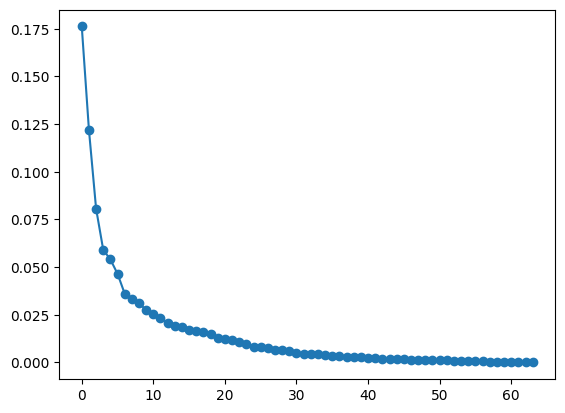

In [181]:
plt.plot(pca.explained_variance_ratio_, 'o-')

In [182]:
pca_model = PCA(n_components= 16)
z = pca_model.fit_transform(data)
z

array([[ 0.11032263,  0.00548512,  0.0081741 , ..., -0.02166798,
        -0.0193114 ,  0.00291085],
       [-0.02332243, -0.05641037,  0.00347491, ...,  0.01069293,
         0.00566619,  0.00119081],
       [-0.02321316,  0.01433734, -0.03848654, ..., -0.00851461,
         0.01547076,  0.00057743],
       ...,
       [-0.04964733,  0.02367006,  0.0017016 , ..., -0.01736614,
         0.01159246,  0.00059924],
       [-0.06276247,  0.03555679, -0.03379333, ..., -0.02414514,
         0.00450964,  0.00887631],
       [-0.0329133 ,  0.03761893, -0.03966885, ..., -0.03803147,
         0.00994014,  0.02225727]])

In [183]:
target = df.iloc[:, -1]
x_tr, x_te, y_tr, y_te = train_test_split(z, target, random_state= 111)
x_tr.shape, x_te.shape, y_tr.shape, y_te.shape

((408, 16), (137, 16), (408,), (137,))

In [184]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_tr, y_tr)
clf.score(x_te, y_te)

0.9635036496350365

# 2

In [199]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

In [202]:
arr_inertial=[]
for n in range(2,50):
    model = KMeans(n_clusters=n,random_state=10)
    model.fit(data)
    arr_inertial.append(model.inertia_)

Text(0, 0.5, 'inertial_value')

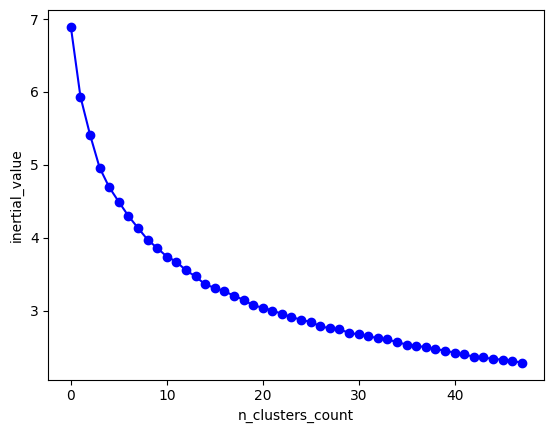

In [203]:
plt.plot(arr_inertial,'bo-')
plt.xlabel('n_clusters_count')
plt.ylabel('inertial_value')

In [205]:
from sklearn.metrics import davies_bouldin_score

In [208]:
db_score=[]
for n in range(2,50):
    model=KMeans(n_clusters=n,random_state=10)
    model.fit(data)

    sc=davies_bouldin_score(data,model.labels_)
    db_score.append(sc)

Text(0, 0.5, 'davies_bouldin_score')

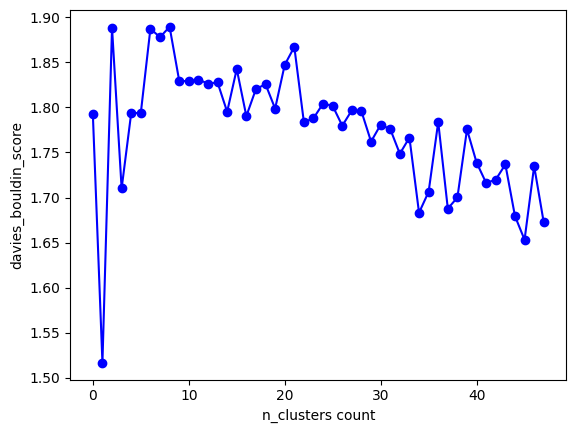

In [209]:
plt.plot(db_score,'bo-')
plt.xlabel('n_clusters count')
plt.ylabel('davies_bouldin_score')